In [2]:
import cv2
import numpy as np
# Load two images
img1 = cv2.imread('ml.png')
img2 = cv2.imread('opencv.png')
# I want to put logo on top-left corner, So I create a ROI


In [3]:
rows,cols,channels = img1.shape
print(rows,cols,channels)

512 512 3


In [4]:
import matplotlib.pyplot as plt
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.THRESH_BINARY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)



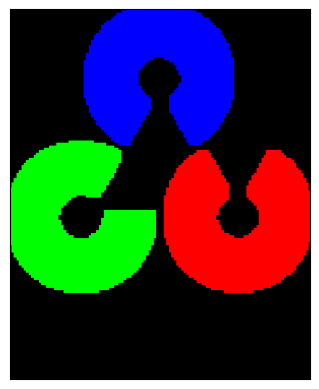

In [5]:
import matplotlib.pyplot as plt

ret, mask = cv2.threshold(img2gray, 180, 255, cv2.THRESH_BINARY)
plt.imshow(img2gray, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
mask_inv = cv2.bitwise_not(mask)

In [7]:


# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv2.imshow('res', img1)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'
